<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-395/477 Redes Neuronales Artificiales I-2018 </h1>

<H3 align='center'> Tarea 0 - Introducción a Redes Neuronales </H3>
<hr style="height:2px;border:none"/>

<H3 align='center'>Integrantes:</H3>
<H3 align='center'>Fernanda Weiss Rol: 201373536-3</H3>
<H3 align='center'>Ignacio Espinoza Rol: 201073527-3</H3>
<hr style="height:2px;border:none"/>

**Temas**  
* NNs por dentro: *back-propagation from scratch*.
* Principales hiperparámetros de *back propagation*
* Introducción a keras
* Verificación numérica de las derivadas implementadas.

** Formalidades **  
* Equipos de trabajo de: 2 personas (*cada uno debe estar en condiciones de responder preguntas sobre cada punto del trabajo realizado*)
* Se debe preparar un (breve) Jupyter/IPython notebook que explique la actividad realizada y las conclusiones del trabajo
* Fecha de entrega: 30 de Marzo.
* Formato de entrega: envı́o de link Github al correo electrónico del ayudante (*<francisco.mena.13@sansano.usm.cl>*) , incluyendo al profesor en copia (*<jnancu@inf.utfsm.cl>*). Por favor especificar el siguiente asunto: [Tarea0-INF395-I-2018]

<hr style="height:2px;border:none"/>


La tarea se divide en cuatro secciones:

[1.](#primero)   Back-propagation (BP) from *Scratch*   
[2.](#segundo)   Comparar back-propagation (BP) de Keras  
[3.](#tercero)   Verificación numérica del gradiente para una componente  
[4.](#cuarto)   Implementar momentum como variante

# Introducción

En el siguiente trabajo se implementará una red neuronal feed fordward con Back-propagation desde cero para resolver un problema de clasificación. Esta red se pondrá a prueba versus una implementación de una red neuronal proporcionada por [Keras](https://keras.io/), una API de alto nivel para redes neuronales escrita en Python.

Para los entrenamientos de cada modelo se utilizará el dataset *[Iris](https://es.wikipedia.org/wiki/Iris_flor_conjunto_de_datos)*, el cual posee datos de 50 muestras de cada una de tres especies de la planta Iris: Iris setosa, Iris virginica e Iris versicolor. Cada entrada del dataset presenta mediciones del ancho y largo se sus sépalos y pétalos, además del tipo de planta en cuestión (clase o etiqueta).

<img src="http://s5047.pcdn.co/wp-content/uploads/2015/04/iris_petal_sepal.png" alt="Mediciones de una planta" style="width: 300px;"/>

<a id="primero"></a>
## 1. Back-propagation (BP) from *Scratch*

BP (Back-propagation) es sin duda el paradigma dominante para entrenar redes neuronales *feed-forward*. En
redes grandes, diseñadas para problemas reales, implementar BP eficientemente puede ser una tarea delicada
que puede ser razonable delegar a una librerı́a especializada. Sin embargo, construir BP *from scratch* es muy
útil con fines pedagógicos.

$$ w^{(t+1)} \leftarrow w^{(t)} - \eta \nabla_{w^{(t)}} Loss $$
 
> a) Escriba un programa que permita entrenar una red FF con una arquitectura fija de 2 capa ocultas (con 32 neuronas en la primera capa y 16 en la segunda) y $K$ neuronas de salida, sin usar librerı́as, excepto eventualmente *numpy* para implementar operaciones básicas de algebra lineal. Por simplicidad, asuma funciones de activacion y error (*loss function*) diferenciables o subdiferenciables, además de tener la misma función de activación para las 2 capas ocultas. Adapte la arquitectura para un problema de clasificación de 3 clases, es decir la función de activación para la capa de salida debe ser **softmax** con número de neuronas $K$=3. Escriba funciones para:  
* (i)  implementar el *forward pass*  
* (ii) implementar el *backward pass*  
* (iii) implementar la rutina principal de entrenamiento, adoptando, por simplicidad, la variante cíclica aleatorizada de SGD (un ejemplo a la vez, pero iterando cíclicamente sobre una configuración aleatoria del conjunto de entrenamiento) con una tasa de aprendizaje fija de 0.1 y número de ciclos fijos (*epochs*).

> b) Escriba una función que permita hacer predicciones mediante la red FF definida anteriormente, sin usar librerı́as, excepto eventualmente *numpy*. Escriba una función vectorizada que implemente el forward pass sobre un conjunto de $n_{t}$ ejemplos, además de implementar la función de decisión, que a través de la salida de la red prediga el valor categórico de la clase (1, 2 o 3).

> c) Demuestre que sus programas funcionan en un problema de clasificación. Para esto utilice el dataset **iris**, disponible a través de la librería __[*sklearn*](http://scikit-learn.org)__, el cual corresponde a la clasificación de distintos tipos de plantas de iris (3 clases) mediante 4 características reales continuas específicas de la planta, deberá entrenar (ajustar) los pesos de la red para realizar la tarea encomendada, variando las funciones de error (*loss*) entre *categorical cross entropy* y *mean squared error*, además de variar las funciones de activación para las 2 capas ocultas entre  ReLU (Rectifier Linear Unit) y la función logística (*sigmoid*). Especifique explícitamente las funciones anteriores, así como sus gradientes. Recuerde que debe transformar las etiquetas usando *one hot vectors*.
<div class="alert alert-block alert-info">Es una buena práctica el normalizar los datos antes de trabajar con el modelo</div>
```python
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
X_train,y_train = load_iris(return_X_y=True)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
#transform target to one hot vector
import keras
y_onehot = keras.utils.to_categorical(y_train)
```
Para evaluar los resultados, construya un gráfico correspondiente al error de clasificación versus número
de epochs, utilizando sólo el conjunto de entrenamiento (el objetivo de esta sección es familiarizarse
con el algoritmo BP, no encontrar la mejor red). Grafique también la evolución de la función objetivo utilizada para el entrenamiento. Además de reportar el tiempo de entrenamiento mediante el algoritmo implementado.  
Por último, para alguna configuración elegida, reporte la matriz de confusión mediante el uso de librerías como *sklearn* o *keras*.

In [1]:
import numpy as np
import keras
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

/home/nacho/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [ ]:
# funciones de activación
epsilon =  1e-10

def sigmoid(x):
    #if x > 0:
    #    x = np.maximum(epsilon, x) #si x es muy pequeño
    #if x < 0:
    #    x = np.maximum(-600.,x)  #si x es muy negativo
    return 1. / (1. + np.exp(-x))
    
def gradient_sigmoid(x):
    return sigmoid(x) * (1. - sigmoid(x))

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0) # only difference

# def gradient_softmax(ypred, ytrue):
#     imax = np.argmax(ypred)
#     ypred = np.zeros(3)
#     ypred[imax] = 1
#     print(ypred,ytrue)
#     if np.argmax(ypred) == np.argmax(ytrue):
#         return softmax(ypred) * (1 - softmax(ypred))  
#     else:
#         return - softmax(ypred)*softmax(ytrue)
def gradient_softmax(ypred, ytrue):
    return softmax(ypred) * (1 - softmax(ypred))

def relu(x):
    return np.maximum(x, 0)

def gradient_relu(x):
    return 1. * (x > 0)

def mse(ytrue, ypred, n_data=150):
    ypred = np.clip(ypred, epsilon, 1 - epsilon)
    return (0.5) * pow(np.subtract(ytrue, ypred), 2)

def gradient_mse(ytrue, ypred, n_data=150):
    return np.subtract(ytrue, ypred)

def cross_entropy(ytrue, ypred, n_data=150):
    ypred = np.clip(ypred, epsilon, 1 - epsilon)
    return -1.0 / n_data * (ytrue * np.log(ypred) + np.subtract(1.0, ytrue) * np.log(np.subtract(1.0, ypred)))

def gradient_ce(ytrue, ypred, n_data=150):
    ypred = np.maximum(epsilon, ypred)
    return np.gradient(cross_entropy(ytrue, ypred))
    #return np.gradient(loss_function(y, ypred, n_data, type_error="cross_entropy"))
    #return -1.0* (y - ypred) / (ypred * np.subtract(1, ypred))
    
    
def create_matrices(layers):
    # matrices de salidas de neuronas
    A = []
    A_derivate = [] 
    # matrices de errores
    error_outputs = []
    error_weights = []
    # pesos de la red
    network_weights = []
    
    L = len(layers)
    for l in range(L):
        A.append(np.zeros(layers[l]))
        A_derivate.append(np.zeros(layers[l]))
        error_outputs.append(np.zeros(layers[l]))
        
    for l in range(L-1):
        error_weights.append(np.zeros((layers[l],layers[l+1])))
        network_weights.append(np.random.rand(layers[l],layers[l+1])/ np.sqrt(layers[l])) 
    


    return network_weights, error_weights, error_outputs, A, A_derivate 

In [ ]:
class NeuralNetwork:
    # layers: información de la cantidad de neuronas por capa
    # activation: función de activación
    # type_loss: función de pérdida
    def __init__(self, layers, activation, loss_func):
        self.L = len(layers) # cantidad capas
        self.S = layers # cantidad de neuronas en cada capa
        self.activation = activation 
        self.loss_func = loss_func
        
        # asignar función gradiente activación
        if activation == sigmoid:
            self.activation_gradient = gradient_sigmoid
        elif activation == relu:
            self.activation_gradient = gradient_relu
        
        if loss_func == mse:
            self.gradient_loss = gradient_mse
        elif loss_func == cross_entropy:
            self.gradient_loss = gradient_ce
        
        # crear arquitectura
        self.weights, self. e_weights, self.e_output, self.neurons, self.n_gradient = create_matrices(layers)
        print("Red neuronal creada")
        print(" - Cantidad de capas   :", len(layers), layers)
        print(" - Activación neuronas :", activation.__name__)
        print(" - Función de pérdida  :", loss_func.__name__)

    
    def forward_pass(self, example):
        x = example[0].copy()
        y = example[1].copy()
        self.neurons[0] = x.copy()

        for l in range(self.L - 2): # por cada capa
            #print("capa", l)
            for s in range(self.S[l+1]):
                #print("-neurona",s)
                aux = np.dot(self.weights[l][:,s], self.neurons[l])
                self.neurons[l+1][s] = self.activation(aux).copy()
                self.n_gradient[l+1][s] = self.activation_gradient(aux).copy()

        for s in range(self.S[self.L-1]): # capa final
            #print("+neu", s)
            aux = np.dot(self.weights[self.L-2][:,s], self.neurons[self.L-2])
            self.neurons[self.L-1][s] = aux.copy()
        self.neurons[self.L-1] = softmax(self.neurons[self.L-1]).copy()    
        self.n_gradient[self.L-1] = gradient_softmax(self.neurons[self.L-1], y).copy() #ypred, ytrue
        
        
    def backward_pass(self, example, learning_rate):
        x = example[0].copy()
        y = example[1].copy()
        print("\nbackward")
        
        ypred = self.neurons[self.L-1].copy()
        print("ytrue", y)
        print("ypred", ypred)
        # error de la capa de salida
        for s in range(self.S[self.L-1]):
            #print("-neurona", s)
            #print("y real",y)
            self.e_output[self.L-1] = self.gradient_loss(y, ypred)
            aux = np.dot(self.n_gradient[self.L-1][s], self.neurons[self.L-2])
            self.e_weights[self.L-2][:,s] = np.dot(self.e_output[self.L-1][s], aux)
            
            #actualizar pesos en vector
            self.weights[self.L-2][:,s] = self.weights[self.L - 2][:,s] \
                                        - learning_rate * self.e_weights[self.L - 2][:,s]
        #print("weights", red.weights)
        # error para el resto de las capas
        for l in np.arange(self.L-2, 0, -1):
            #print("capa", l)
            for s in range(self.S[l]):
                #print("neurona", s,self.neurons[l-1])
                self.e_output[l][s] = np.sum(self.e_output[l+1])
                #print(np.sum(self.e_output[l+1]))
                #print(self.e_output[l+1])
                self.e_weights[l-1][:,s] = np.dot(self.e_output[l][s], 
                                                  np.dot(self.n_gradient[l][s], self.neurons[l-1]) )
                #print(self.neurons[l-1])
                # actualizar pesos
                self.weights[l-1][:,s] = self.weights[l-1][:,s] \
                                        - learning_rate \
                                        * self.e_weights[l-1][:,s]
                
    def train(self, X, Y, epoch, learning_rate):
        data = list(zip(X,Y))
        epoch_loss = []
        epoch_error = []
        for i in range(epoch):
            loss = []
            error = []
            np.random.shuffle(data)
            for example in data:
                print(example)
                # fordward
                self.forward_pass(example)
                ypred = self.neurons[self.L-1].copy()
                loss.append(self.loss_func(example[1], ypred))
                # backward
                error.append(1 - example[1][np.argmax(ypred)])

                self.backward_pass(example, learning_rate)
            epoch_loss.append(np.mean(loss))
            epoch_error.append(np.mean(error))
            
        return epoch_loss, epoch_error

      
        
X_train,y_train = load_iris(return_X_y=True)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

#transform target to one hot vector
y_onehot = keras.utils.to_categorical(y_train)        
        
     
        
red = NeuralNetwork([X_train.shape[1], 32, 16, 3], activation=sigmoid, loss_func=cross_entropy)

print("neuronas", red.neurons)
print("gradiente", red.n_gradient)
print("weights", red.weights)
print("e_output",red.e_output)

red.train(X_train, y_onehot,epoch=100, learning_rate=0.1)

In [2]:
        
X_train,y_train = load_iris(return_X_y=True)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

#transform target to one hot vector
y_onehot = keras.utils.to_categorical(y_train)

In [ ]:
class NeuralNetwork:
    def __init__(self):
        self.input_size = 4
        self.first_layer = 32
        self.second_layer = 16
        self.output_size = 3
        
        # pesos de neuronas
        self.w1 = np.random.randn(self.input_size, self.first_layer)
        self.w2 = np.random.randn(self.first_layer, self.second_layer)
        self.w3 = np.random.randn(self.second_layer,self.output_size)

#     def forward_pass(self, X):
#         inw1 = np.dot(X, self.w1) # input X por pesos capa entrada
#         ouw1 = sigmoid(inw1) # funcion activacion
#         inw2 = np.dot(ouw1, self.w2) # capa oculta 1 por pesos capa oculta dos
#         ouw2 = sigmoid(inw2) # funcion activacion
#         inw3 = np.dot(ouw2, self.w3) #c capa oculta 2 por pesos capa salida
#         ouw3 = softmax(inw3) # funcion activacion final
#         return ouw3
    
#     def backward_pass(self, X, ytrue, ypred): #y = true, o = pred
#         # backward propgate through the network
#         o_error = ytrue - ypred # error in output
#         print(o_error)
#         o_delta = o_error * gradient_sigmoid(ypred) # applying derivative of sigmoid to error

#         z3_error = o_delta.dot(self.w3.T) # z2 error: how much our hidden layer weights contributed to output error
#         z3_delta = z3_error * gradient_sigmoid(self.z2) # applying derivative of sigmoid to z2 error

#         #self.W1 += X.T.dot(self.z2_delta) # adjusting first set (input --> hidden) weights
#         #self.W2 += self.z2.T.dot(self.o_delta) # adjusting second set (hidden --> output) weights
    def train(self, X, ytrue):
        # por cada ejemplo (sgd)
        for x, y in zip(X,ytrue):
            x = x.reshape((4,1))
            print(x.shape)
            # forward pass
            inw1 = np.dot(x.T, self.w1) # input X por pesos capa entrada
            print(inw1)
            out1 = sigmoid(inw1) # funcion activacion
            inw2 = np.dot(out1, self.w2) # capa oculta 1 por pesos capa oculta dos
            out2 = sigmoid(inw2) # funcion activacion
            inw3 = np.dot(out2, self.w3) #c capa oculta 2 por pesos capa salida
            ypred = softmax(inw3) # funcion activacion final

            # backward pass
            ypred_error = y - ypred

            derv_w3 = np.dot(out2,ypred_error)
            #o_delta = ypred_error * gradient_sigmoid(ypred)
            #z3_error = o_delta.dot(self.w3.T)
            #z3_delta = z3_error * gradient_sigmoid(self.z2)
    
nn = NeuralNetwork()
epoch = 1
for iteration in range(epoch+1):
    #o=nn.forward_pass(example)
    #nn.backward_pass(example,y,o )
    nn.train(X_train, y_onehot)

# Parte 2 - Comparar back-propagation (BP) de Keras

Mediante Keras es posible definir fácilmente la arquitectura de una red, agregando capa por capa a la red detallando la cantidad de neuronas, la función de activación, la función de pérdida, entre otras configuraciones disponibles en la librería. Acá se visualiza la diferencia entre construir a mano una arquitectura de red neuronal versus la rapidez de importar y utilizar una librería que en cuatro lineas logra un resultado igual o mejor.

Se genera modelos combinando las funciones de activación Sigmoidal/ReLU y las funciones de pérdida CCO/MSE.

In [3]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
import time 

model1 = Sequential()
model1.add(Dense(32, input_dim=X_train.shape[1], activation="sigmoid"))
model1.add(Dense(16, activation="sigmoid"))
model1.add(Dense(3, activation="softmax"))
model1.compile(optimizer=SGD(lr=0.1),loss="categorical_crossentropy", metrics=["accuracy"])
model2 = Sequential()
model2.add(Dense(32, input_dim=X_train.shape[1], activation="sigmoid"))
model2.add(Dense(16, activation="sigmoid"))
model2.add(Dense(3, activation="softmax"))
model2.compile(optimizer=SGD(lr=0.1),loss="mse", metrics=["accuracy"])
model3 = Sequential()
model3.add(Dense(32, input_dim=X_train.shape[1], activation="sigmoid"))
model3.add(Dense(16, activation="sigmoid"))
model3.add(Dense(3, activation="softmax"))
model3.compile(optimizer=SGD(lr=0.1),loss="categorical_crossentropy", metrics=["accuracy"])
model4 = Sequential()
model4.add(Dense(32, input_dim=X_train.shape[1], activation="relu"))
model4.add(Dense(16, activation="relu"))
model4.add(Dense(3, activation="softmax"))
model4.compile(optimizer=SGD(lr=0.1),loss="mse", metrics=["accuracy"])

Con las arquitecturas ya creadas se procede a entrenar los modelos, midiendo el tiempo que le toma a cada red.

start_time = time.time()
history1 = model1.fit(X_train, y_onehot, epochs=100, batch_size=1, verbose=0)
print("-- training time Sigmoid/CCE : %s [s] --" % (time.time() - start_time))

start_time = time.time()
history2 = model2.fit(X_train, y_onehot, epochs=100, batch_size=1, verbose=0)
print("-- training time Sigmoid/MSE : %s [s] --" % (time.time() - start_time))

start_time = time.time()
history3 = model3.fit(X_train, y_onehot, epochs=100, batch_size=1, verbose=0)
print("-- training time ReLU/CCE : %s [s] --" % (time.time() - start_time))

start_time = time.time()
history4 = model4.fit(X_train, y_onehot, epochs=100, batch_size=1, verbose=0)
print("-- training time ReLU/MSE : %s [s] --" % (time.time() - start_time))

COMENTARIO TIEMPOS

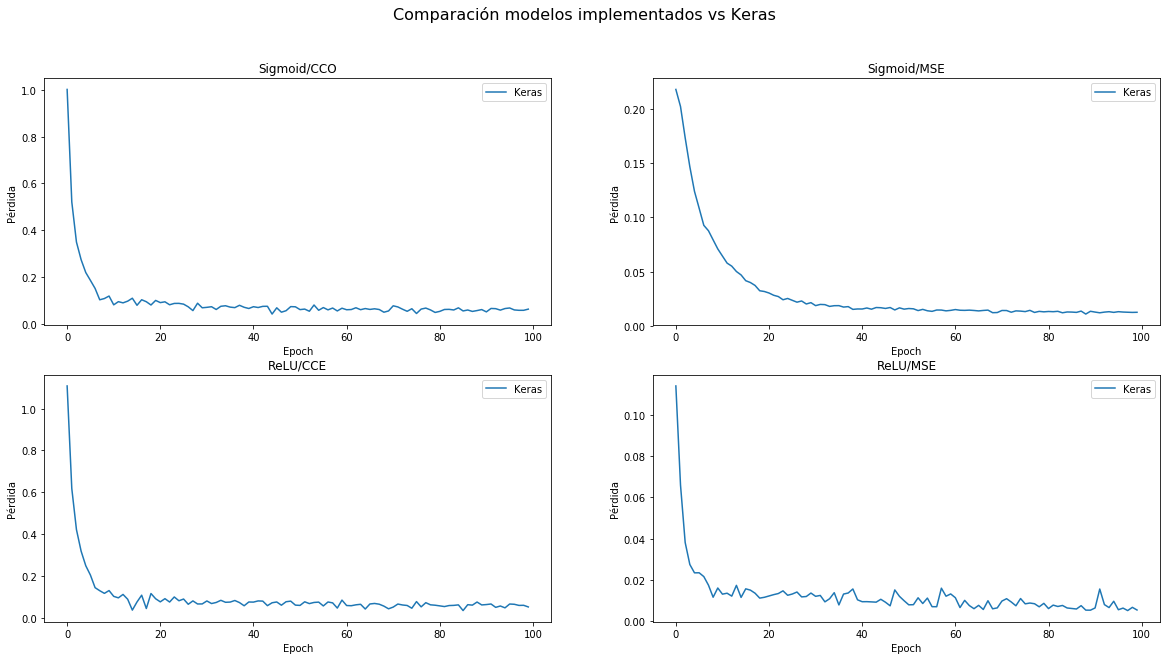

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,10))
plt.suptitle("Comparación modelos implementados vs Keras", fontsize=16)

plt.subplot(221)
plt.gca().set_title('Sigmoid/CCE') 
plt.plot(history1.history["loss"], label="Keras")
#plt.plot(epoch1, loss1, label="Implementación")
plt.xlabel("Epoch")
plt.ylabel("Pérdida")
plt.legend(["Keras","Implementación"])

plt.subplot(222)
plt.gca().set_title('Sigmoid/MSE')
plt.plot(history2.history["loss"], label="Keras")
#plt.plot(loss2, label="Implementación")
plt.xlabel("Epoch")
plt.ylabel("Pérdida")
plt.legend(["Keras","Implementación"])

plt.subplot(223)
plt.gca().set_title('ReLU/CCE')
plt.plot(history3.history["loss"], label="Keras")
#plt.plot(loss3, label="Implementación")
plt.xlabel("Epoch")
plt.ylabel("Pérdida")
plt.legend(["Keras","Implementación"])

plt.subplot(224)
plt.gca().set_title('ReLU/MSE')
plt.plot(history4.history["loss"], label="Keras")
#plt.plot(loss4, label="Implementación")
plt.xlabel("Epoch")
plt.ylabel("Pérdida")
plt.legend(["Keras","Implementación"])
plt.show()


- error clasificacion vs epochs (solo con entrenamiento)
- Grafique también la evolución de la función objetivo utilizada para el entrenamiento
- Además de reportar el tiempo de entrenamiento mediante el algoritmo implementado. 
-------------------------------------
- Loss: valor escalar que se trata de minimizar durante el entrenamiento de un modelo. Mientras menos sea , más cercanas son las predicciones a las etiquetas verdaderas.
- Epoch es una pasada completa sobre todos los datos de entrenamiento. 

In [32]:
from sklearn.metrics import confusion_matrix, classification_report

predictions1 = model1.predict(X_train, verbose=0)
y_pred1 = np.argmax(predictions1, axis=1)
print("Matriz de confusión Sigmoid/CCO")
print(confusion_matrix(y_train, y_pred1))

predictions2 = model2.predict(X_train, verbose=0)
y_pred2 = np.argmax(predictions2, axis=1)
print("Matriz de confusión Sigmoid/MSE")
print(confusion_matrix(y_train, y_pred2))

predictions3 = model3.predict(X_train, verbose=0)
y_pred3 = np.argmax(predictions3, axis=1)
print("Matriz de confusión ReLU/CCO")
print(confusion_matrix(y_train, y_pred3))

predictions4 = model4.predict(X_train, verbose=0)
y_pred4 = np.argmax(predictions4, axis=1)
print("Matriz de confusión ReLU/MSE")
print(confusion_matrix(y_train, y_pred4))

Matriz de confusión Sigmoid/CCO
[[50  0  0]
 [ 0 49  1]
 [ 0  1 49]]
Matriz de confusión Sigmoid/MSE
[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]
Matriz de confusión ReLU/CCO
[[50  0  0]
 [ 0 48  2]
 [ 0  1 49]]
Matriz de confusión ReLU/MSE
[[50  0  0]
 [ 0 49  1]
 [ 0  0 50]]


La matriz de confusión (o error matrix) es una herramienta que permite visualizar el desempeño de un algoritmo en machine learning, especialmente con algoritmos supervisados (en el caso de no supervisados se utiliza la matriz de matching). Cada fila de la matriz representa las instancias en una clase predecida, mientras que las columnas representan las instancias en una clase real. Tiene un especial uso para analizar cuándo un clasificador tiene confusión entre dos clases. Para este experimento se utilizará la matriz proporcionada por la librería *sklearn*.

Mostrando las matrices de confusión para los cuatro modelos queda en evidecia los problemas que existen para clasificar los datos de la clase dos y tres (Iris Versicolor e Iris Virginica, respectivamente] por su similitud en la frontera que separa las dos clases. Los modelos clasifican bien la primera clase pues sus datos son diferenciables del resto.

# Parte 3 - Verificación numérica del gradiente para una componente

Para un peso escogido aleatoriamente entre la primera capa de la red (*input*) y la primera capa oculta,el gradiente o la derivada analítica del error corresponde a $\frac{\partial Loss}{\partial w_1}$.

# Parte 4 - Implementar *momentum* como variante

En redes neuronales, se utiliza *gradient descent* para minimizar el error de la función de evaluación para alcanzar un mínimo global. En un espacio de soluciones cóncavo es fácil encontrar un óptimo global porque no hay mínimos locales donde la función pueda quedarse atrapada. En problemas más complejos, los espacios de soluciones tienden a ser convexos, dificultando la posibilidad de encontrar un óptimo global.

Para evitar esta situación, se introduce el concepto de *momentum* en la función objetivo, el cual se evalua en $[0,1]$ incrementando el tamaño de los pasos que da el algoritmos para escapar de estos mínimos locales. Si se escoje un *momentum* grande, entonces la tasa de aprendizaje debería mantenerse más pequeña. Un gran valor de *momentum* también significa que la convergencia ocurrirá rápidamente. Pero si tanto el *momentum* como la tasa de aprendizaje se mantienen en valores grandes, entonces puede escapar de un mínimo con un gran paso. Un valor pequeño de *momentum* no puede evitar de manera confiable los mínimos locales, ralentizando el entrenamiento del sistema. El *momentum* también ayuda a suavizar las variaciones, si el gradiente cambia de dirección.

Dada una función objetivo $f(\theta)$ a ser minimizada, el momentum clásico viene dado por:

$$ v^{(t+1)} \leftarrow \mu v^{(t)} - \eta \nabla_{w^{(t)}} Loss \\
w^{(t+1)} \leftarrow w^{(t)} + v^{(t+1)}
$$

donde $\eta$ es la tasa de aprendizaje (*learning rate*), $\mu\in[0,1]$ es el coeficiente de momentum, y $\nabla_{w^{(t)}} Loss$ es el gradiente de $w^{(t)}$.